# Regression
Nous allons comparer 4 algorhitmes de régression afin de prédire la pulsation du coeur au repos de sportif. \
Modèle utilisé:
* Regression linéaire
* Decision Tree
* Random Forest
* Gradient Boosting
## Imports

In [1]:
#manipulation de données
import pandas as pd
import numpy as np
#visualisation de données
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

#outils ML 
from sklearn.datasets import load_linnerud
from sklearn.model_selection import train_test_split 

#modèles ML 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

#métriques 
from sklearn.metrics import (mean_absolute_error, mean_squared_error, r2_score)

## Chargement et préparatio des données 

In [11]:
#chargement du dataset
bunch = load_linnerud()
X = pd.DataFrame(bunch.data, columns=bunch.feature_names)
Y = pd.DataFrame(bunch.target, columns=bunch.target_names)
df = pd.concat([X, Y], axis=1)
y = df['Pulse']
X = df.drop(columns=['Pulse'])

## Exploration des données

In [12]:
df.head()

,Chins,Situps,Jumps,Weight,Waist,Pulse
0,5.0,162.0,60.0,191.0,36.0,50.0
1,2.0,110.0,60.0,189.0,37.0,52.0
2,12.0,101.0,101.0,193.0,38.0,58.0
3,12.0,105.0,37.0,162.0,35.0,62.0
4,13.0,155.0,58.0,189.0,35.0,46.0


In [26]:
print(df['Pulse'].min())
print(df['Pulse'].max())

46.0
74.0


<Axes: >

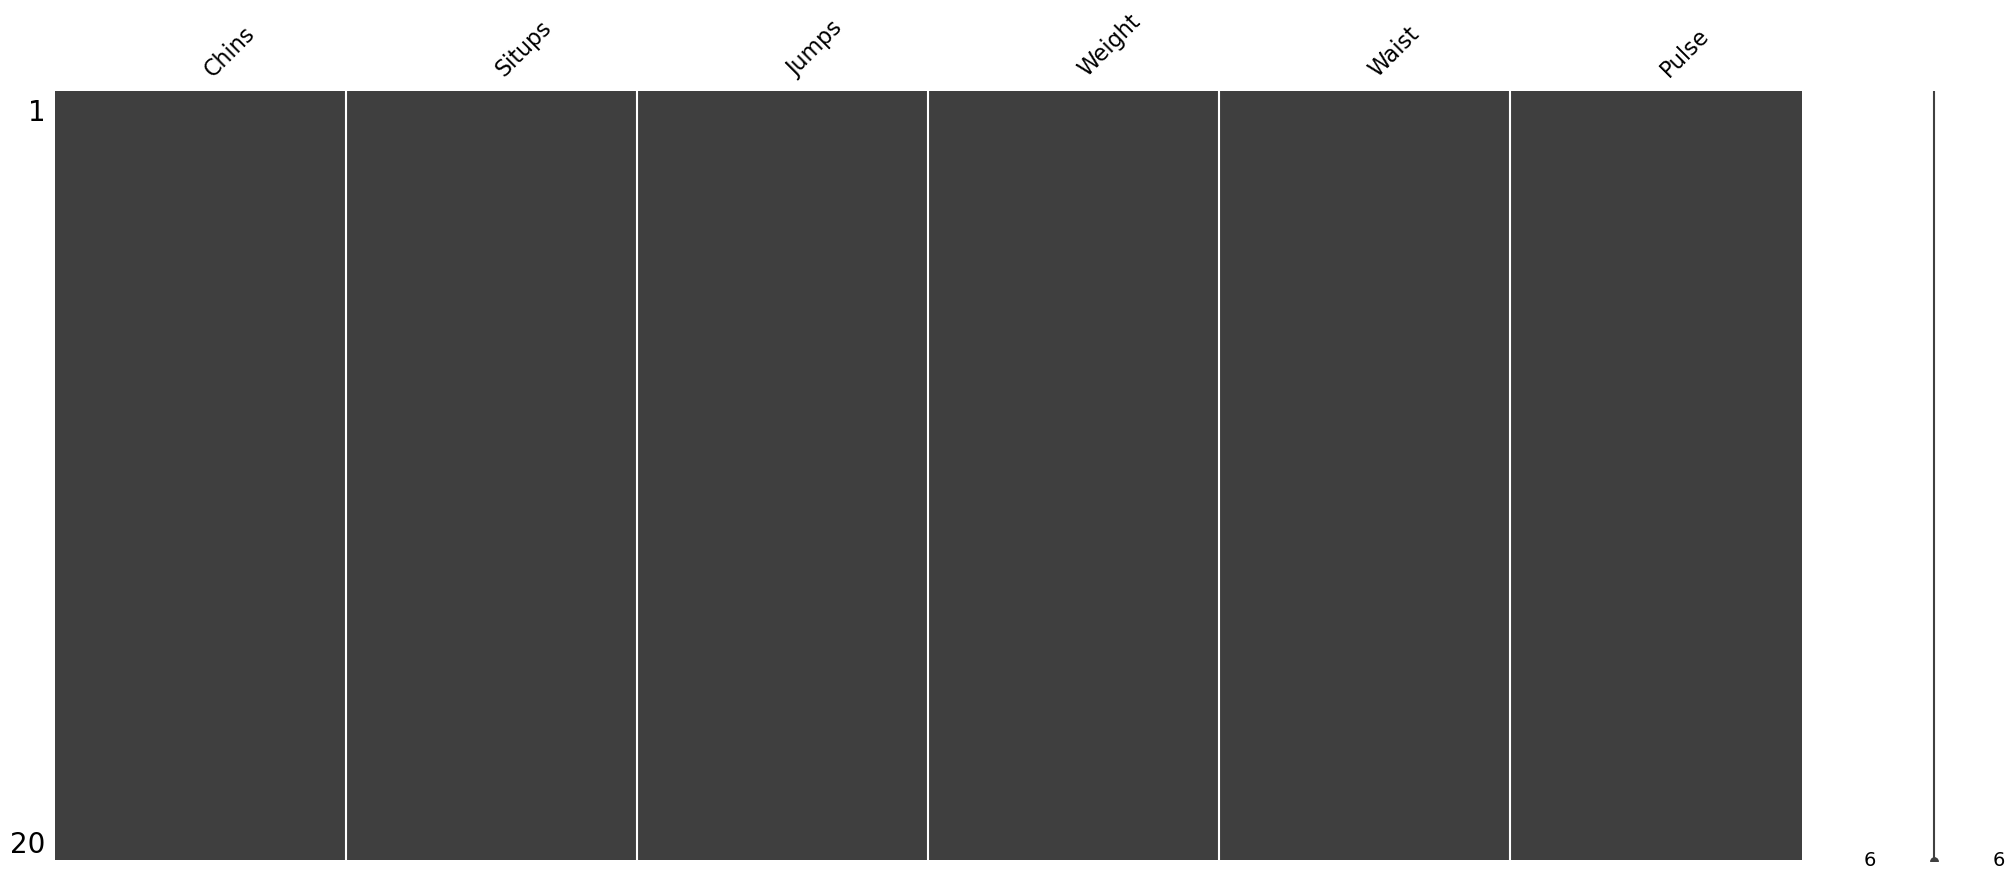

In [13]:
msno.matrix(df)

## Séparation train/test

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=44
                                                   )                                    

## Modèle de régression

In [22]:
def regression(X_train, X_test, y_train, y_test):
    """
    Entraine et évalue plusieurs modèles de régression
    """
    #stocker les modèle dans un dict
    model = { "linear_reg" : LinearRegression(),
              "decision_tree": DecisionTreeRegressor(),
              "random_forest": RandomForestRegressor(),
              "gradient_boost": GradientBoostingRegressor()
            }

    for a, b in model.items(): #boucler sur le dict
        print(f"{a}") #afficher le noms des modèle 
        b.fit(X_train, y_train) #compiler
        y_pred = b.predict(X_test) #prédire 

        #métriques 
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)

        #afficher les metriques 
        print("----------REGRESSION METRICS----------")
        print(f"MAE   (Mean Absolute Error)          : {mae:.4f}")
        print(f"MSE   (Mean Squared Error)           : {mse:.4f}")
        print(f"RMSE  (Root Mean Squared Error)      : {rmse:.4f}")
        print(f"R²    (Coefficient de détermination) : {r2:.4f}")

        #visualiser les métriques
        fig, axes = plt.subplots(1, 2, figsize=(15, 5))
        
        axes[0].scatter(y_test, y_pred, alpha=0.6, s=100, edgecolors='k')
        axes[0].plot([y_test.min(), y_test.max()], 
                     [y_test.min(), y_test.max()], 
                     'r--', lw=2, label='Prédiction parfaite')
        axes[0].set_xlabel('Valeur du bien', fontsize=12)
        axes[0].set_ylabel('Valeur prédite', fontsize=12)
        axes[0].set_title('Prédictions vs Valeurs Réelles', fontsize=14, fontweight='bold')
        axes[0].legend()
        axes[0].grid(True, alpha=0.3)
        
        erreurs = y_test - y_pred
        axes[1].hist(erreurs, bins=20, edgecolor='black', alpha=0.7)
        axes[1].axvline(x=0, color='red', linestyle='--', linewidth=2, label='Erreur nulle')
        axes[1].set_xlabel('Erreur de prédiction', fontsize=12)
        axes[1].set_ylabel('Fréquence', fontsize=12)
        axes[1].set_title('Distribution des Erreurs', fontsize=14, fontweight='bold')
        axes[1].legend()
        axes[1].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()

linear_reg
----------REGRESSION METRICS----------
MAE   (Mean Absolute Error)          : 10.7262
MSE   (Mean Squared Error)           : 180.8514
RMSE  (Root Mean Squared Error)      : 13.4481
R²    (Coefficient de détermination) : -6.2341


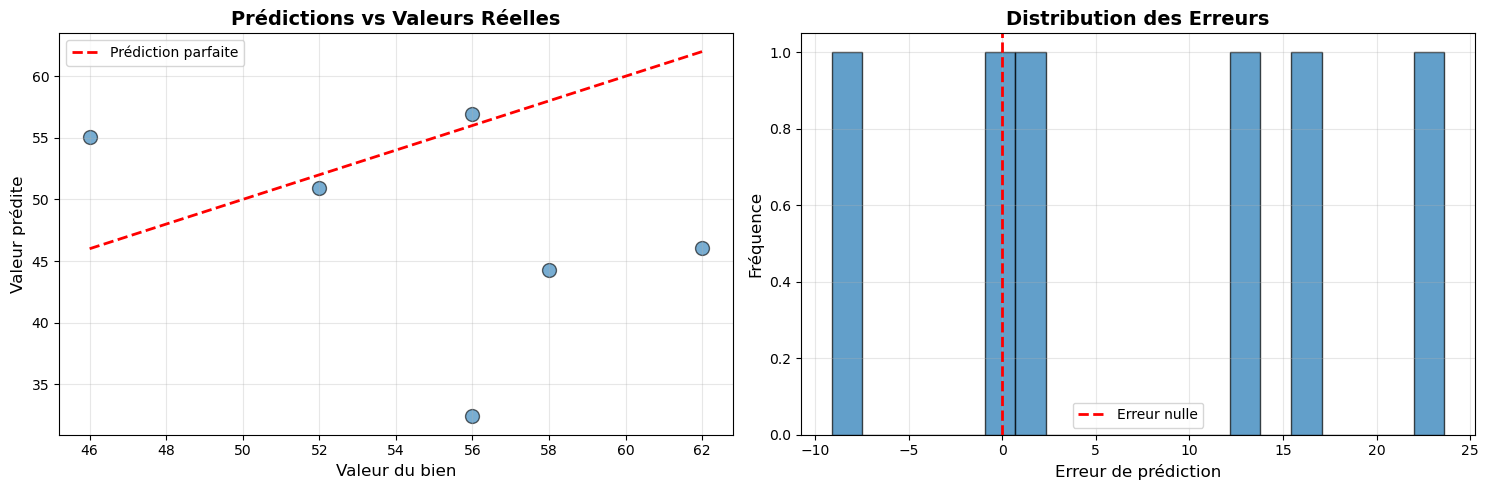

decision_tree
----------REGRESSION METRICS----------
MAE   (Mean Absolute Error)          : 6.0000
MSE   (Mean Squared Error)           : 56.0000
RMSE  (Root Mean Squared Error)      : 7.4833
R²    (Coefficient de détermination) : -1.2400


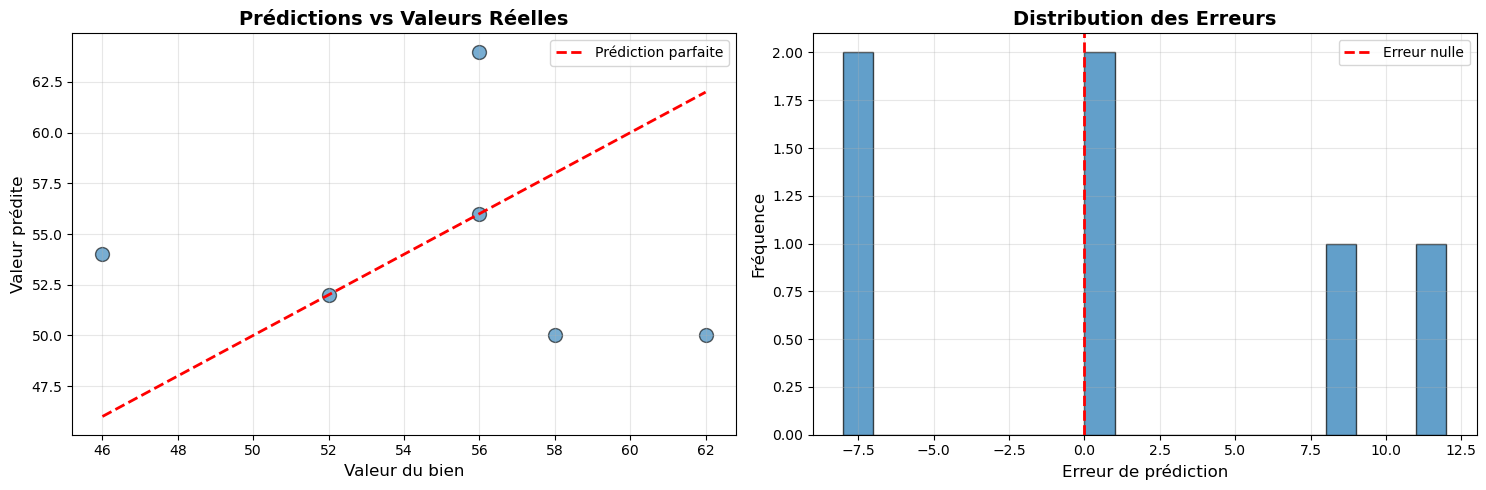

random_forest
----------REGRESSION METRICS----------
MAE   (Mean Absolute Error)          : 5.6667
MSE   (Mean Squared Error)           : 41.2200
RMSE  (Root Mean Squared Error)      : 6.4203
R²    (Coefficient de détermination) : -0.6488


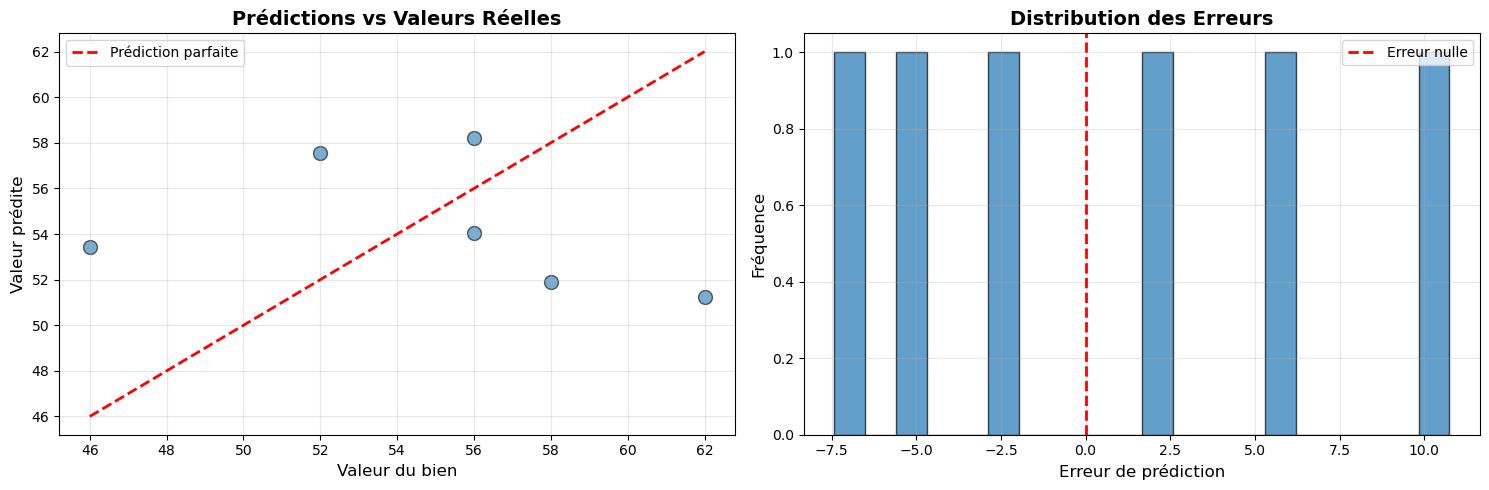

gradient_boost
----------REGRESSION METRICS----------
MAE   (Mean Absolute Error)          : 5.2588
MSE   (Mean Squared Error)           : 42.4532
RMSE  (Root Mean Squared Error)      : 6.5156
R²    (Coefficient de détermination) : -0.6981


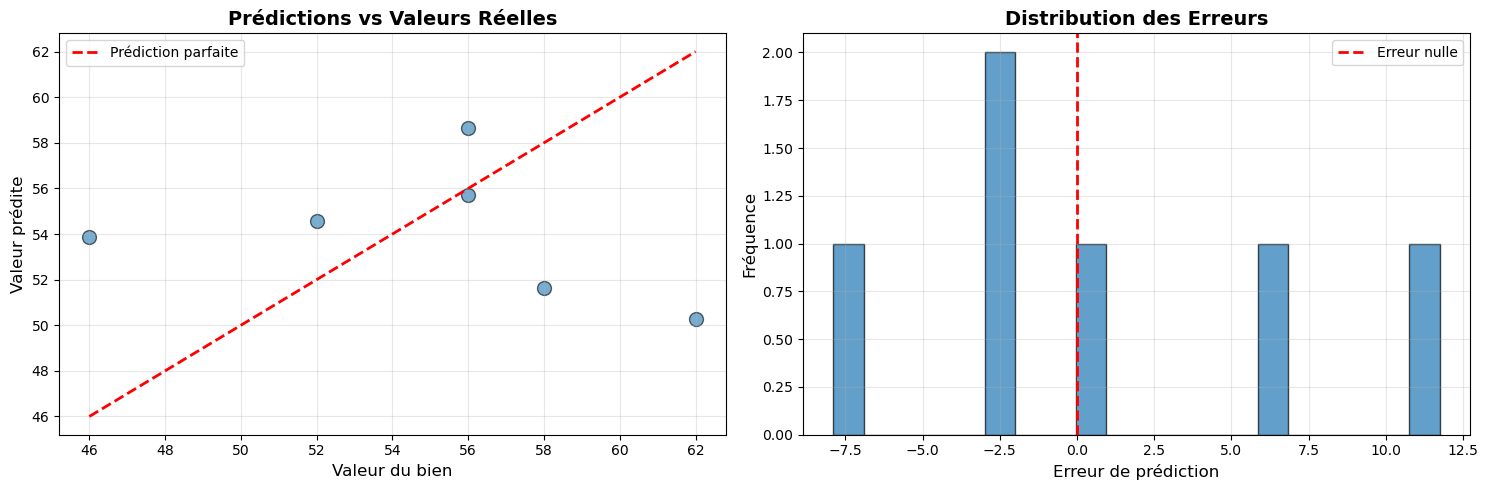

In [23]:
regression(X_train, X_test, y_train, y_test)

## Analyse des résultats 
valeurs de Pulse comprise entre 46 et 74 bpm
### Régression linéaire
* En moyenne, le modèle se trompe de 10 bpm, c'est trop
* RMSE>MAE : quelques erreurs significatives : modèle instable
* le modèle fait pire que le hasards
* modèle pas performant
### Decision Tree 
* Le modèle fait des prédictions aléatoires, aucune explication de la variabilité des données
* RMSE > MAE : le modèle fait quelque erreurs significatives
* En moyenne, il se trompe de 6 bpm
* Modèle plus ou moins stable, mais n'explique pas la variance donc inutile
### Random Forest
* Erreur moyenne de 5 bpm
* Prédictions aléatoire
* modèle peu stable
* pas performant
### Gradient Boosting 
* erreur moyenne de 5 bpm
* prédictions aléatoire
* modèle peu stable

## Conclusion 
Sans tuning, aucun de ses modèles ne sont exploitable.